# **Import Library yang dibutuhkan**

In [24]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [25]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_TorBrowser_1.csv")
df.head()

,userName,score,at,content
0,Bakmi Jawa,5,2024-06-30 20:34:27,The best
1,Hakiki,4,2024-06-30 13:12:11,Semoga aplikasi ini bisa menambah knowledge ba...
2,Tikno Bro,5,2024-06-28 12:52:49,Bisa membuka dark web
3,xzy bitz,1,2024-06-26 19:49:08,di update malah tambah lelet
4,Smart CCTV Sidoarjo,5,2024-06-20 14:28:10,Good


In [26]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,The best
1,Semoga aplikasi ini bisa menambah knowledge ba...
2,Bisa membuka dark web
3,di update malah tambah lelet
4,Good
...,...
1208,god
1209,coba dulu
1210,Perbedaan tor browser yang ini dengan yang alp...
1211,bagus banget


In [27]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1213 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


In [28]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,1213
unique,1000
top,Good
freq,35


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [29]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1213, 1)

In [30]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [31]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [32]:
# Menghapus data yang kosong

df = df.dropna()

In [33]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [34]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1000, 1)

In [35]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [36]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [37]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,The best,the best
1,Semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi ini bisa menambah knowledge ba...
2,Bisa membuka dark web,bisa membuka dark web
3,di update malah tambah lelet,di update malah tambah lelet
4,Good,good
...,...,...
1205,Mengapa lemot? yah pastilah namanya juga anda ...,mengapa lemot yah pastilah namanya juga anda n...
1206,aplikasi lelet,aplikasi lelet
1207,coba,coba
1208,god,god


# **Normalization**

In [38]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,The best,the best,the best
1,Semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi ini bisa menambah knowledge ba...
2,Bisa membuka dark web,bisa membuka dark web,bisa membuka dark web
3,di update malah tambah lelet,di update malah tambah lelet,di update malah tambah lelet
4,Good,good,good
...,...,...,...
1205,Mengapa lemot? yah pastilah namanya juga anda ...,mengapa lemot yah pastilah namanya juga anda n...,mengapa lemot yah pastilah namanya juga anda n...
1206,aplikasi lelet,aplikasi lelet,aplikasi lelet
1207,coba,coba,coba
1208,god,god,god


# **Stopwords**

In [39]:
# Menginstall Library Sastrawi

!pip install Sastrawi

In [40]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["aku", "anda", "bagaimana", "bahwa", "banyak", "beberapa", "bisa", "dan", "dari", "dengan", "dia", "di", "ini", "itu", "kamu", "kami", "kapan", "karena", "kita", "mereka", "pada", "saja", "sangat", "saya", "sebagaimana", "sebagai", "sebelum", "sudah", "tetapi", "tidak", "untuk", "yang",
                   "saya", "kamu", "dia", "mereka", "kita", "kami", "engkau", "anda", "kalian", "ini", "itu", "di", "ke", "dari", "pada", "dengan", "untuk", "kepada", "oleh", "sampai", "hingga", "sejak", "demi", "dan", "atau", "tetapi", "bahwa", "sehingga", "karena", "meskipun", "walaupun", "namun", "si",
                   "sang", "para", "bukan", "sudah", "belum", "masih", "akan", "telah", "sedang", "bisa", "dapat", "harus"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,The best,the best,the best,the best
1,Semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi bisa menambah knowledge saya g...
2,Bisa membuka dark web,bisa membuka dark web,bisa membuka dark web,membuka dark web
3,di update malah tambah lelet,di update malah tambah lelet,di update malah tambah lelet,update malah tambah lelet
4,Good,good,good,good
...,...,...,...,...
1205,Mengapa lemot? yah pastilah namanya juga anda ...,mengapa lemot yah pastilah namanya juga anda n...,mengapa lemot yah pastilah namanya juga anda n...,lemot yah pastilah namanya anda numpang menggu...
1206,aplikasi lelet,aplikasi lelet,aplikasi lelet,aplikasi lelet
1207,coba,coba,coba,coba
1208,god,god,god,god


# **Tokenize**

In [41]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,The best,the best,the best,the best,"[the, best]"
1,Semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi ini bisa menambah knowledge ba...,semoga aplikasi bisa menambah knowledge saya g...,"[semoga, aplikasi, bisa, menambah, knowledge, ..."
2,Bisa membuka dark web,bisa membuka dark web,bisa membuka dark web,membuka dark web,"[membuka, dark, web]"
3,di update malah tambah lelet,di update malah tambah lelet,di update malah tambah lelet,update malah tambah lelet,"[update, malah, tambah, lelet]"
4,Good,good,good,good,[good]
...,...,...,...,...,...
1205,Mengapa lemot? yah pastilah namanya juga anda ...,mengapa lemot yah pastilah namanya juga anda n...,mengapa lemot yah pastilah namanya juga anda n...,lemot yah pastilah namanya anda numpang menggu...,"[lemot, yah, pastilah, namanya, anda, numpang,..."
1206,aplikasi lelet,aplikasi lelet,aplikasi lelet,aplikasi lelet,"[aplikasi, lelet]"
1207,coba,coba,coba,coba,[coba]
1208,god,god,god,god,[god]


# **Stemming**

In [42]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_TorBrowser_1.csv', index = False)


In [43]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_TorBrowser_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,the best
1,moga aplikasi bisa tambah knowledge saya gaptek
2,buka dark web
3,update malah tambah lelet
4,good
...,...
995,lot yah pasti nama anda numpang guna ip negara...
996,aplikasi lelet
997,coba
998,god


# **Translate**

In [44]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [45]:
# import pandas as pd
# from easynmt import EasyNMT

In [46]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_TorBrowser_1.csv', encoding = 'latin1')


In [47]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [48]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [49]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [50]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TorBrowser_1.csv')

In [51]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TorBrowser_1.csv')
df_values

,Unnamed: 0,steamming,steamming_en
0,0,the best,the best
1,1,moga aplikasi bisa tambah knowledge saya gaptek,The application may add knowledge to my gaptek
2,2,buka dark web,open dark web
3,3,update malah tambah lelet,The update is even more slow.
4,4,good,good
...,...,...,...
995,995,lot yah pasti nama anda numpang guna ip negara...,I bet your name is for the country. What can y...
996,996,aplikasi lelet,slow application
997,997,coba,try
998,998,god,god


# **Labeling**

In [52]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TorBrowser_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,the best,the best
1,moga aplikasi bisa tambah knowledge saya gaptek,The application may add knowledge to my gaptek
2,buka dark web,open dark web
3,update malah tambah lelet,The update is even more slow.
4,good,good
...,...,...
995,lot yah pasti nama anda numpang guna ip negara...,I bet your name is for the country. What can y...
996,aplikasi lelet,slow application
997,coba,try
998,god,god


In [53]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [54]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 453
Netral = 400
Negatif = 147

Total Data Seluruhnya : 1000


In [56]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,the best,the best,Positif
1,moga aplikasi bisa tambah knowledge saya gaptek,The application may add knowledge to my gaptek,Netral
2,buka dark web,open dark web,Negatif
3,update malah tambah lelet,The update is even more slow.,Positif
4,good,good,Positif
...,...,...,...
995,lot yah pasti nama anda numpang guna ip negara...,I bet your name is for the country. What can y...,Netral
996,aplikasi lelet,slow application,Negatif
997,coba,try,Netral
998,god,god,Netral


In [57]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,the best,the best,Positif
1,moga aplikasi bisa tambah knowledge saya gaptek,The application may add knowledge to my gaptek,Netral
2,buka dark web,open dark web,Negatif
3,update malah tambah lelet,The update is even more slow.,Positif
4,good,good,Positif
...,...,...,...
995,lot yah pasti nama anda numpang guna ip negara...,I bet your name is for the country. What can y...,Netral
996,aplikasi lelet,slow application,Negatif
997,coba,try,Netral
998,god,god,Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



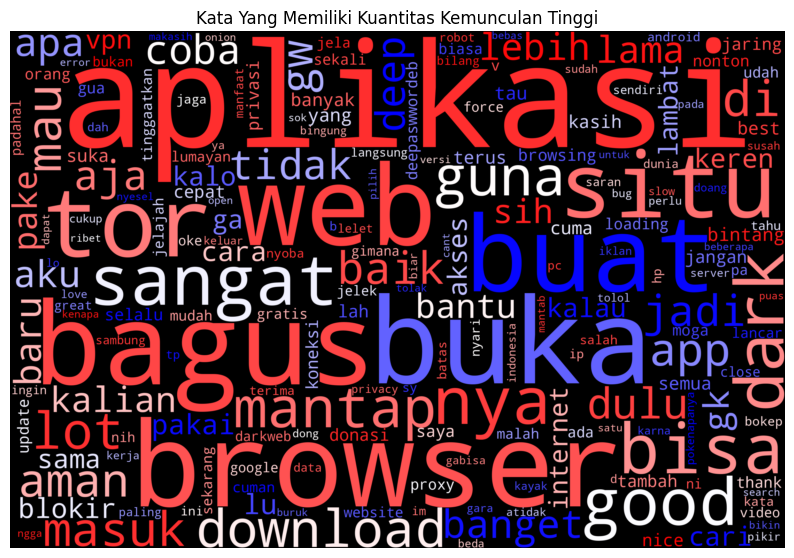

In [58]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


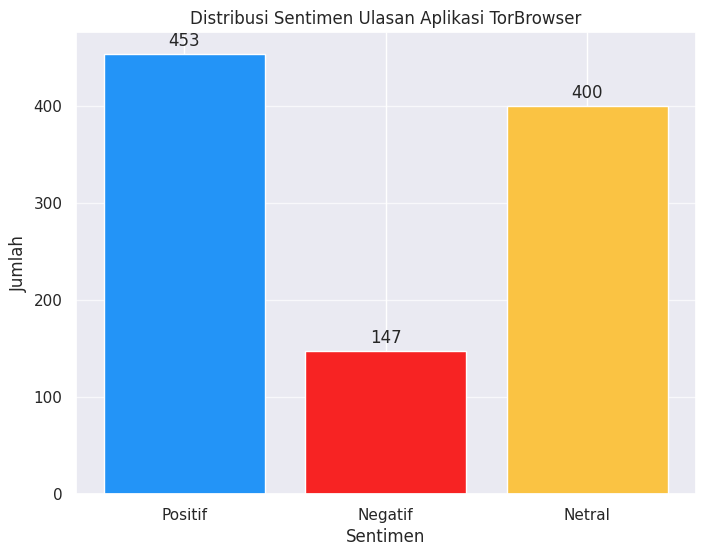

In [59]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TorBrowser")


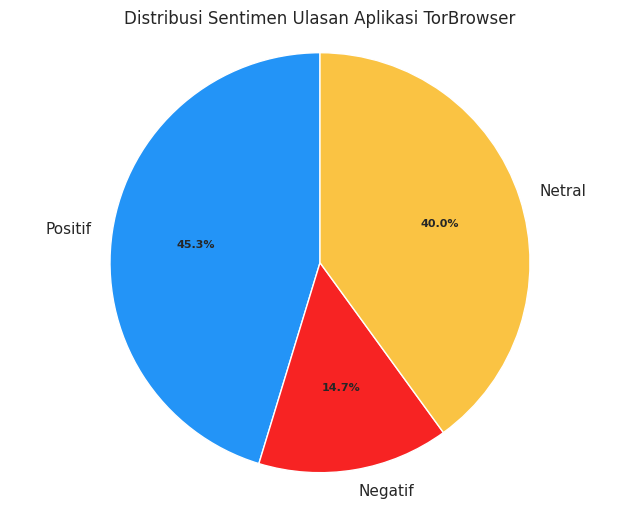

In [60]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TorBrowser")

In [61]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,the best,the best,Positif
2,buka dark web,open dark web,Negatif
3,update malah tambah lelet,The update is even more slow.,Positif
4,good,good,Positif
5,its not good and it doesnt work well,its not good and it doesn't work well,Negatif
...,...,...,...
989,ksi dulu nnti bagus tinggal nambain,It's good to see you.,Positif
990,koneksi internet lambat perlu tinggaatkan,a slow Internet connection needs to be left be...,Negatif
993,thank for you are for this safe great browser,thank for you are for this safe great browser,Positif
994,ajar dulu,Teach me first.,Positif


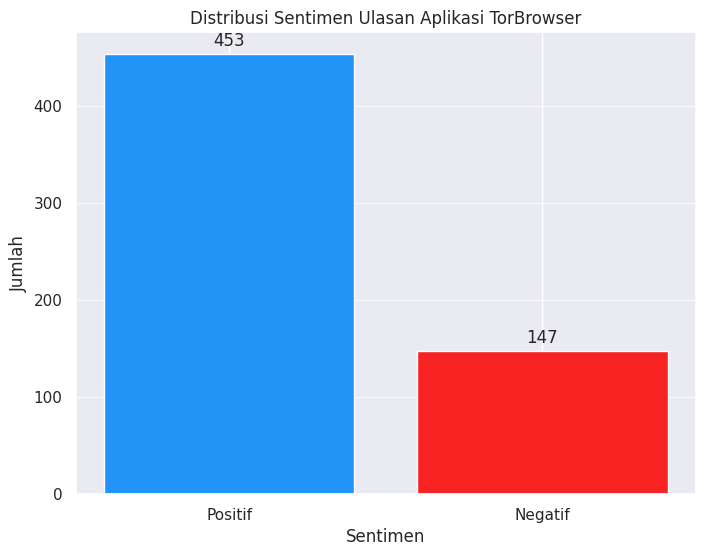

In [62]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TorBrowser")


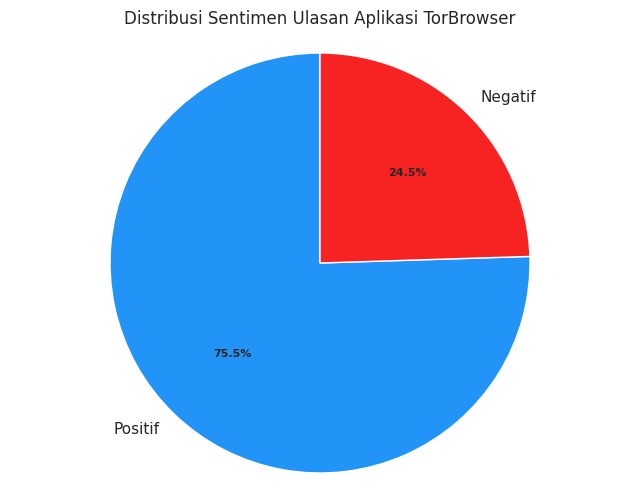

In [63]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TorBrowser")

In [64]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,the best,the best,0
2,buka dark web,open dark web,1
3,update malah tambah lelet,The update is even more slow.,0
4,good,good,0
5,its not good and it doesnt work well,its not good and it doesn't work well,1
...,...,...,...
989,ksi dulu nnti bagus tinggal nambain,It's good to see you.,0
990,koneksi internet lambat perlu tinggaatkan,a slow Internet connection needs to be left be...,1
993,thank for you are for this safe great browser,thank for you are for this safe great browser,0
994,ajar dulu,Teach me first.,0


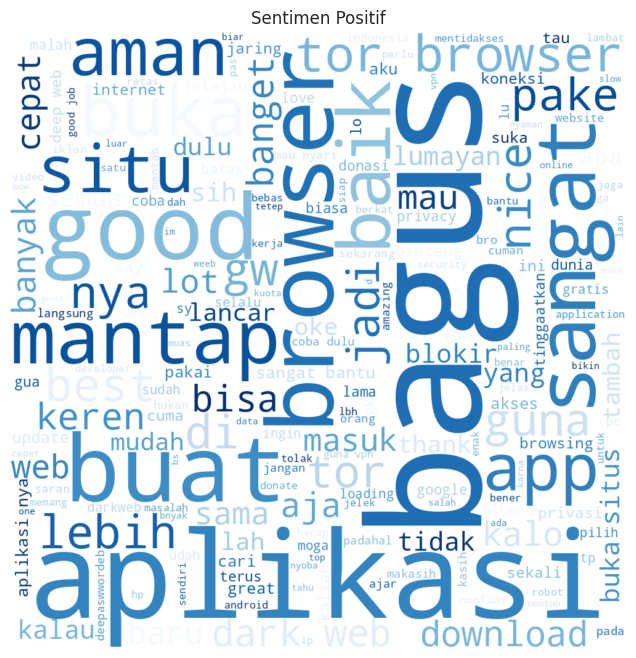

In [65]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

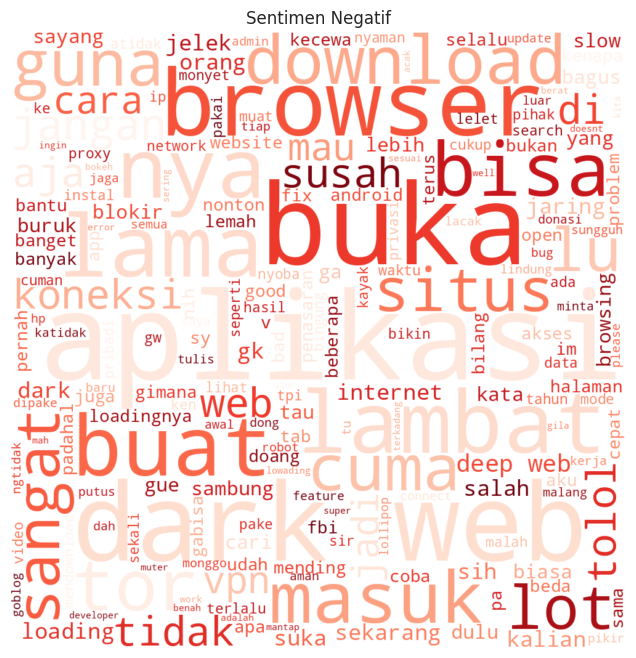

In [66]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

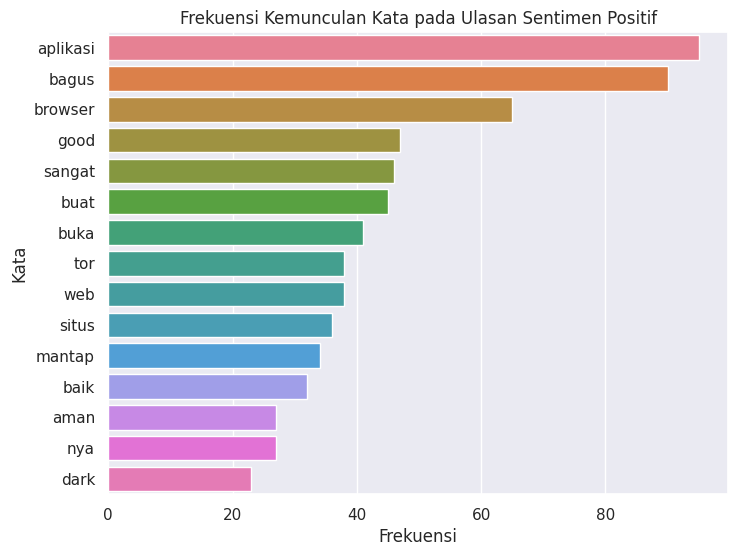

In [67]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [68]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
aplikasi         95
   bagus         90
 browser         65
    good         47
  sangat         46
    buat         45
    buka         41
     tor         38
     web         38
   situs         36
  mantap         34
    baik         32
    aman         27
     nya         27
    dark         23


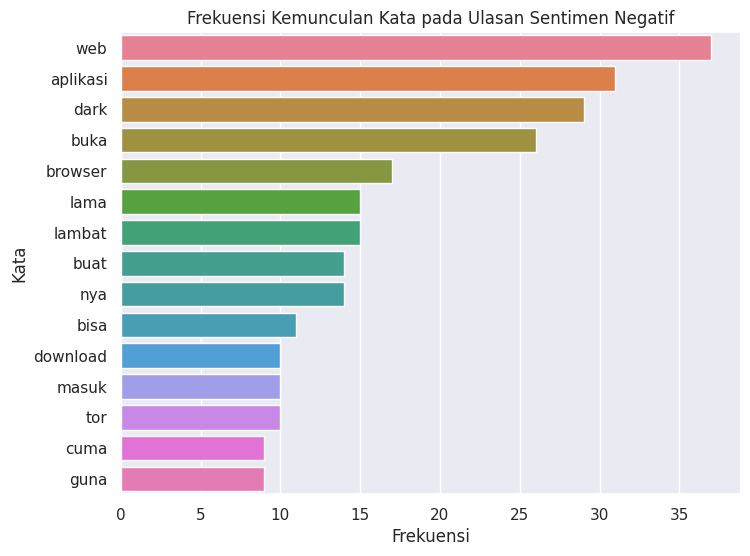

In [69]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [70]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
     web         37
aplikasi         31
    dark         29
    buka         26
 browser         17
    lama         15
  lambat         15
    buat         14
     nya         14
    bisa         11
download         10
   masuk         10
     tor         10
    cuma          9
    guna          9


In [71]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    453
1    147
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [72]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [73]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [74]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

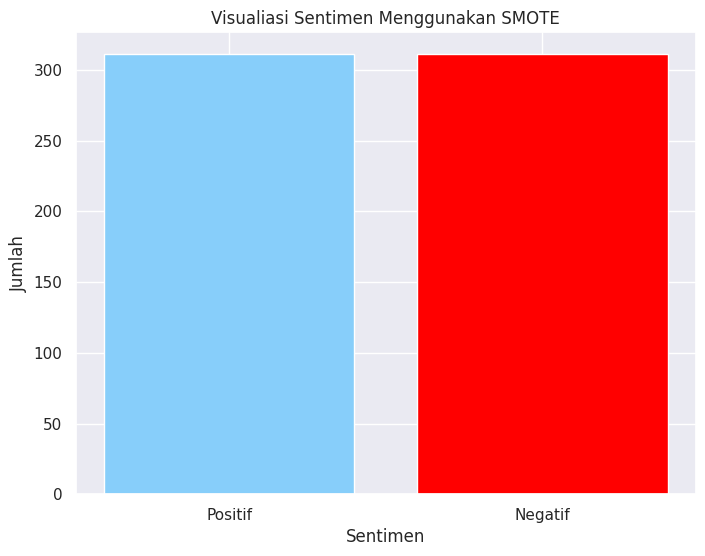

In [75]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [76]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [77]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8444444444444444
Akurasi untuk c = 0.05: 0.85
Akurasi untuk c = 0.25: 0.8611111111111112
Akurasi untuk c = 0.5: 0.8611111111111112
Akurasi untuk c = 0.75: 0.8611111111111112
Akurasi untuk c = 1: 0.8555555555555555


In [79]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [80]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8555555555555555 


In [81]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8556

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       142
           1       0.65      0.68      0.67        38

    accuracy                           0.86       180
   macro avg       0.78      0.79      0.79       180
weighted avg       0.86      0.86      0.86       180



In [82]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[128  14]
 [ 12  26]]

True Positives (TP) =  128

True Negatives (TN) =  26

False Positives (FP) =  14

False Negatives (FN) =  12

Accuracy =  0.8555555555555555


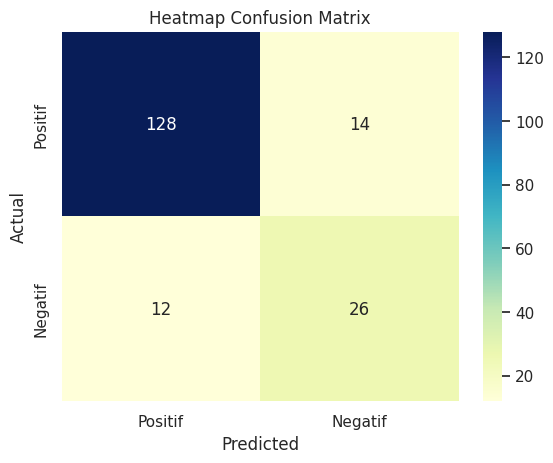

In [83]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [84]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [85]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8556


In [86]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1444


# **Testing**

In [87]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : di update malah tambah lelet
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 64.99%
Probabilitas: 64.98972253442015 %


In [88]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Browser yg luar biasa, tanpa iklan, bebas sensor, point pentingnya gratis ! Update terbaru semoga lbh baik dlm hal kecepatan dan kinerjanya 👍👍👍👍
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 85.18%
Probabilitas: 85.18020576087115 %
